# Read and Write Mesh Data

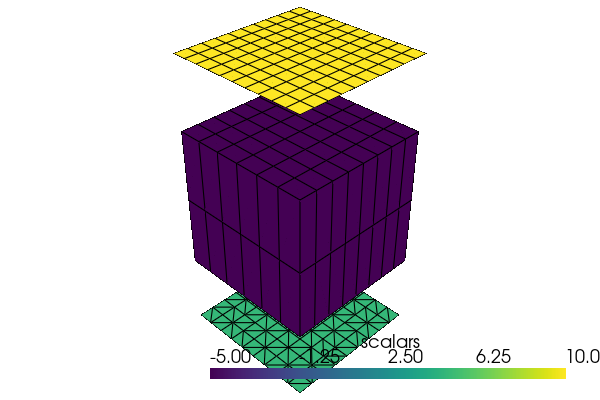

In [1]:
from sigmaepsilon.mesh import PolyData, TriMesh, Grid
from sigmaepsilon.mesh.space import StandardFrame
import numpy as np

A = StandardFrame(dim=3)
tri = TriMesh(size=(100, 100), shape=(10, 10), frame=A)
grid2d = Grid(size=(100, 100), shape=(10, 10), eshape="Q4", frame=A)
grid3d = Grid(size=(100, 100, 100), shape=(8, 6, 2), eshape="H8", frame=A)

mesh = PolyData(frame=A)
mesh["tri", "T3"] = tri.move(np.array([0.0, 0.0, -50]))
mesh["grids", "Q4"] = grid2d.move(np.array([0.0, 0.0, 150]))
mesh["grids", "H8"] = grid3d

mesh["tri", "T3"].pointdata["values"] = np.full(tri.coords().shape[0], 5.0)
mesh["grids", "Q4"].pointdata["values"] = np.full(grid2d.coords().shape[0], 10.0)
mesh["grids", "H8"].pointdata["values"] = np.full(grid3d.coords().shape[0], -5.0)

mesh.to_standard_form()
mesh.lock(create_mappers=True)

mesh.pvplot(
    notebook=True,
    window_size=(600, 400),
    jupyter_backend="static",
    scalars=mesh.pd["values"].to_numpy(),
    theme="document",
)

In [2]:
mesh.pd.to_parquet("pd.parquet")
mesh["tri", "T3"].cd.to_parquet("cdT3.parquet")
mesh["grids", "Q4"].cd.to_parquet("cdQ4.parquet")
mesh["grids", "H8"].cd.to_parquet("cdH8.parquet")
paths = ["pd.parquet", "cdT3.parquet", "cdQ4.parquet", "cdH8.parquet"]

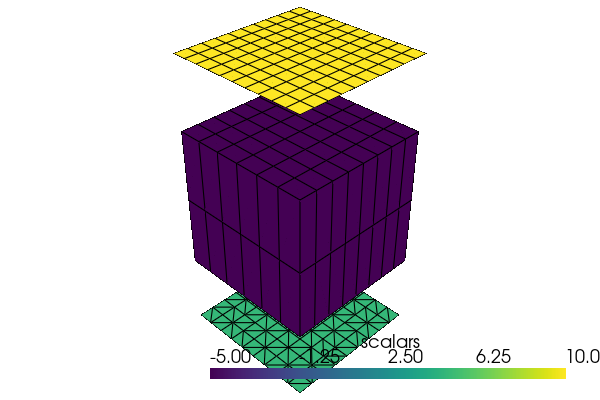

In [3]:
from sigmaepsilon.mesh.cells import T3, Q4, H8
from sigmaepsilon.mesh import PointData

frame = StandardFrame(dim=3)

pd = PointData.from_parquet("pd.parquet")
mesh = PolyData(pd, frame=frame)

cdT3 = T3.from_parquet("cdT3.parquet")
mesh["tri", "T3"] = PolyData(cdT3, frame=frame)

cdQ4 = Q4.from_parquet("cdQ4.parquet")
mesh["grids", "Q4"] = PolyData(cdQ4, frame=frame)

cdH8 = H8.from_parquet("cdH8.parquet")
mesh["grids", "H8"] = PolyData(cdH8, frame=frame)

mesh.to_standard_form()
mesh.lock(create_mappers=True)

mesh.pvplot(
    notebook=True,
    window_size=(600, 400),
    jupyter_backend="static",
    scalars=mesh.pd["values"].to_numpy(),
    theme="document",
)

In [4]:
mesh.to_parquet("mesh_pd.parquet", "mesh_cd.parquet")
paths.extend(["mesh_pd.parquet", "mesh_cd.parquet"])

In [5]:
df_pd, df_cd = mesh.to_dataframe()

In [6]:
import os

for path in paths:
    if os.path.exists(path):
        os.remove(path)

In [7]:
from sigmaepsilon.math.logical import isclose

A = StandardFrame(dim=3)
tri = TriMesh(size=(100, 100), shape=(10, 10), frame=A)
grid2d = Grid(size=(100, 100), shape=(10, 10), eshape="Q4", frame=A)
grid3d = Grid(size=(100, 100, 100), shape=(8, 6, 2), eshape="H8", frame=A)

mesh = PolyData(frame=A)
mesh["tri", "T3"] = tri.move(np.array([0.0, 0.0, -50]))
mesh["grids", "Q4"] = grid2d.move(np.array([0.0, 0.0, 150]))
mesh["grids", "H8"] = grid3d

mesh["tri", "T3"].pointdata["values"] = np.full(tri.coords().shape[0], 5.0)
mesh["grids", "Q4"].pointdata["values"] = np.full(grid2d.coords().shape[0], 10.0)
mesh["grids", "H8"].pointdata["values"] = np.full(grid3d.coords().shape[0], -5.0)

mesh.to_standard_form()
mesh.lock(create_mappers=True)

volume = mesh.volume()

mesh.pd.to_parquet("pd.parquet")
mesh["tri", "T3"].cd.to_parquet("cdT3.parquet")
mesh["grids", "Q4"].cd.to_parquet("cdQ4.parquet")
mesh["grids", "H8"].cd.to_parquet("cdH8.parquet")
paths = ["pd.parquet", "cdT3.parquet", "cdQ4.parquet", "cdH8.parquet"]

pd = PointData.from_parquet("pd.parquet")
mesh = PolyData(pd, frame=A)
cdT3 = T3.from_parquet("cdT3.parquet")
mesh["tri", "T3"] = PolyData(cdT3, frame=A)
cdQ4 = Q4.from_parquet("cdQ4.parquet")
mesh["grids", "Q4"] = PolyData(cdQ4, frame=A)
cdH8 = H8.from_parquet("cdH8.parquet")
mesh["grids", "H8"] = PolyData(cdH8, frame=A)

assert isclose(volume, mesh.volume(), atol=1e-5, rtol=None)

mesh.to_standard_form()
t = mesh.topology()
t0 = mesh.coords().shape[0]
imin = np.min(t)
t1 = np.max(t) - imin + 1

assert t0 == t1
assert imin == 0

for path in paths:
    if os.path.exists(path):
        os.remove(path)